## Initial Setup

In [13]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Ignore useless warnings (from SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# to plot figures directly on the notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# This is used to display all columns. It helps during Exploratory Data Analysis (EDA)
pd.pandas.set_option('display.max_columns', None)

## Load the data

In [14]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

## Exploratory Data Analysis

In [15]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Checking for missing values

In [21]:
null_features = [features for features in train_set.columns if train_set[features].isnull().sum()>0]

for feature in null_features:
    print(feature, np.round(train_set[feature].isnull().mean() * 100, 2),  '% of missing values')

LotFrontage 17.74 % of missing values
Alley 93.77 % of missing values
MasVnrType 0.55 % of missing values
MasVnrArea 0.55 % of missing values
BsmtQual 2.53 % of missing values
BsmtCond 2.53 % of missing values
BsmtExposure 2.6 % of missing values
BsmtFinType1 2.53 % of missing values
BsmtFinType2 2.6 % of missing values
Electrical 0.07 % of missing values
FireplaceQu 47.26 % of missing values
GarageType 5.55 % of missing values
GarageYrBlt 5.55 % of missing values
GarageFinish 5.55 % of missing values
GarageQual 5.55 % of missing values
GarageCond 5.55 % of missing values
PoolQC 99.52 % of missing values
Fence 80.75 % of missing values
MiscFeature 96.3 % of missing values


### Numerical features

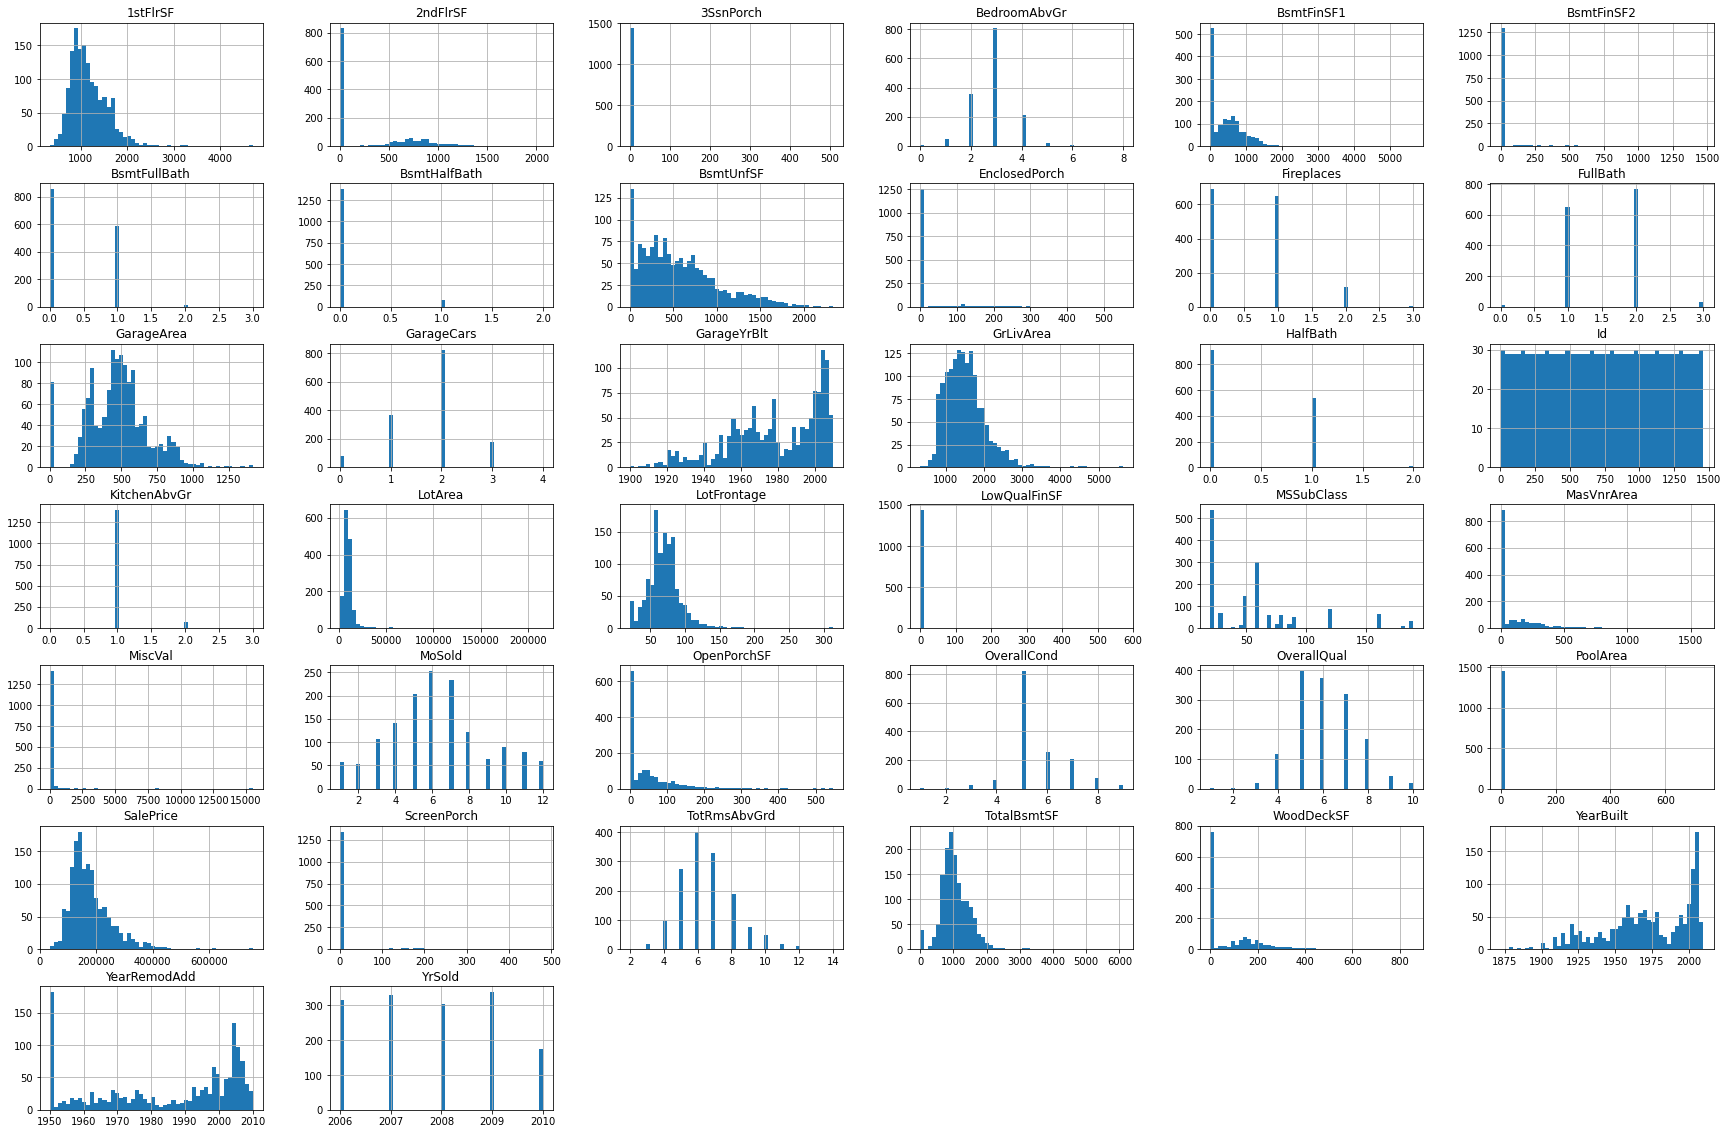

In [28]:
train_set.hist(bins=50, figsize=(30,20))
plt.show()

In [30]:
# list of numerical variables
num_features = [feature for feature in train_set.columns if train_set[feature].dtypes != 'O']
print('Number of numerical features: ', len(num_features))
train_set[num_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Variables (eg., dates)

In [36]:
# Investigating the numerical features, there are the features that contain temporal variables:
temporal_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# Exploring the content of these features:
for feature in temporal_features:
    print(feature, ':', train_set[feature].unique(), '\n')

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1

Text(0.5, 1.0, 'House Price vs YearSold')

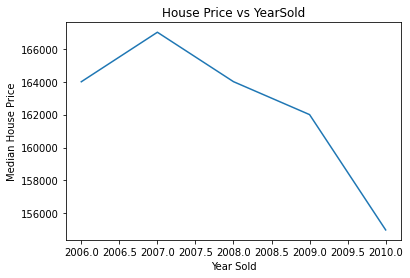

In [50]:
# YrSold x SalePrice

train_set.groupby('YrSold')['SalePrice'].median().plot() # group by median
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

It seems that more recent sales have lower values, but this information doesn't make much sense.<br>
This could be happening due to the number of houses sold in each year, quality of data from previous years and much more.<br>
On the other hand, it could also be a reflection of the 2008 house market crash.

In [45]:
train_set.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

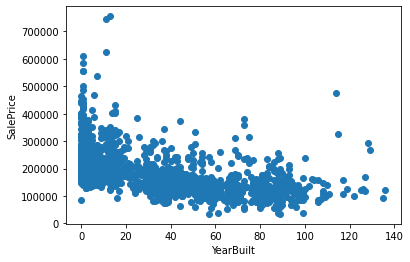

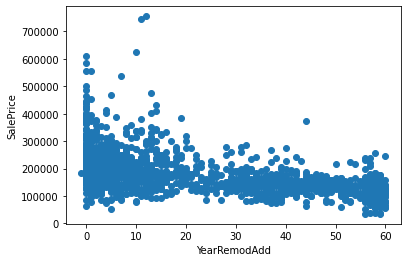

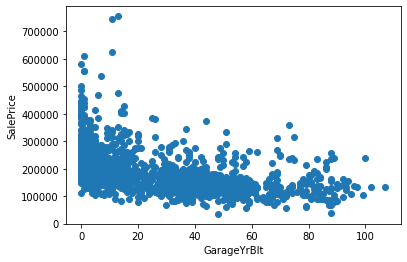

In [57]:
# Let's compare the other year features x SalePrice
for feature in temporal_features:
    if feature != 'YrSold':
        data = train_set.copy()
        # Difference between year variable and year the house was sold for
        data[feature] = data['YrSold'] - data[feature]

        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

The correlation is clear. Newer houses or recenlty renovated have better SalePrices.

### Discrete Features x Continuous Features

#### Discrete Features

In [98]:
# Let's assume these are features with less than 25 different values

discrete_features = [feature for feature in num_features 
                    if len(train_set[feature].unique()) < 25 and feature not in temporal_features + ['Id']]

print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 17


In [99]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

This approach is not precise (eg., PoolArea, LowQualFinSF and 3SsnPorch are cleary continuous; MiscVal means nothing), but help us to trim down the data a little bit and visualize it.

In [103]:
# after adjustment:
not_discrete_features = ['PoolArea', 'LowQualFinSF', '3SsnPorch', 'MiscVal']
discrete_features_corrected = [feature for feature in discrete_feature if feature not in not_discrete_features]
print("Discrete Variables Count: {}".format(len(discrete_features_corrected)))

Discrete Variables Count: 13


In [105]:
discrete_features_corrected

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold']

In [108]:
train_set[discrete_features_corrected].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,2
1,20,6,8,0,1,2,0,3,1,6,1,2,5
2,60,7,5,1,0,2,1,3,1,6,1,2,9
3,70,7,5,1,0,1,0,3,1,7,1,3,2
4,60,8,5,1,0,2,1,4,1,9,1,3,12


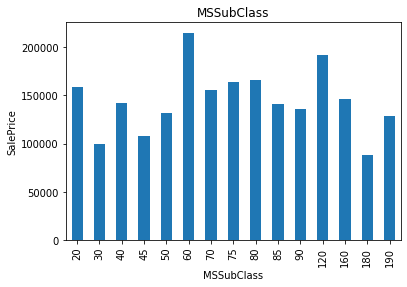

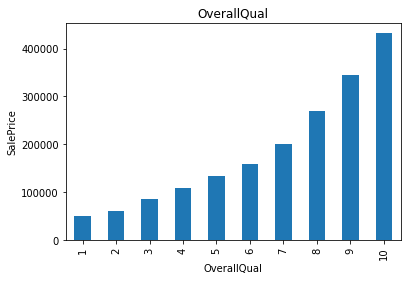

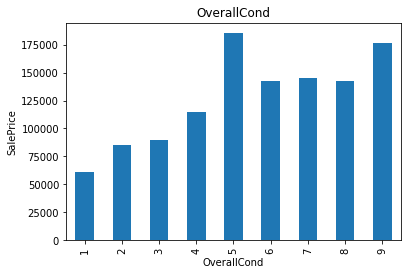

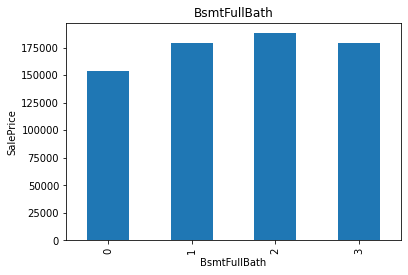

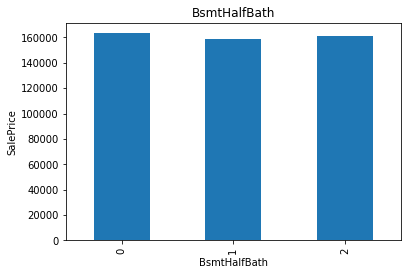

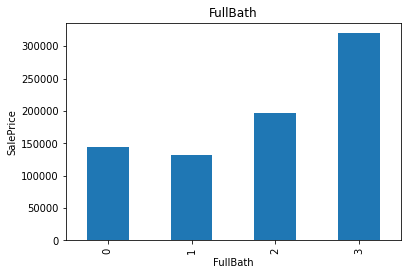

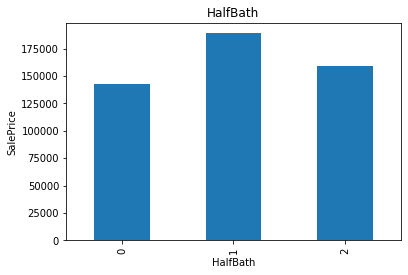

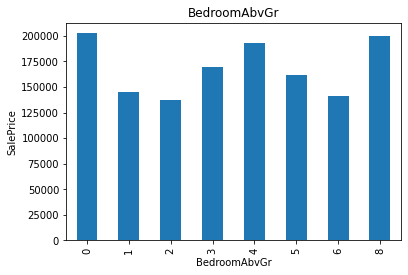

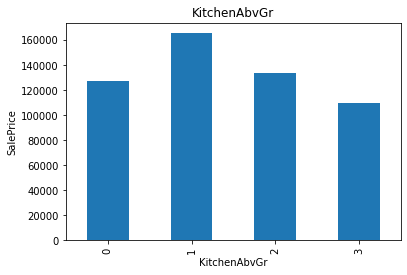

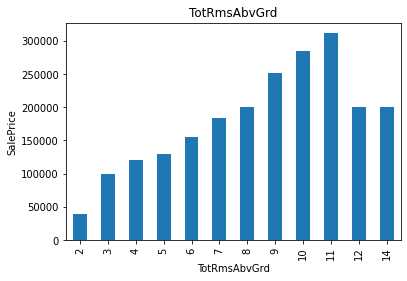

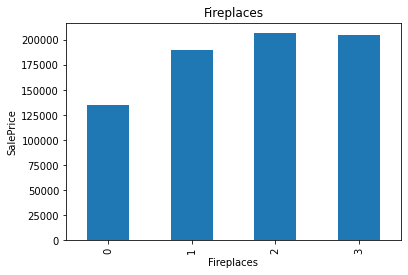

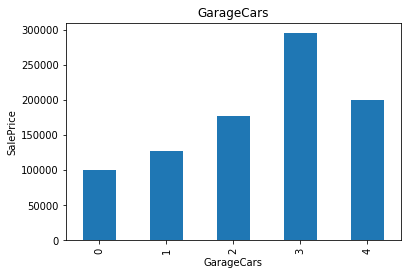

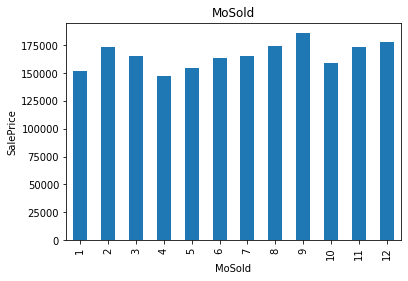

In [115]:
# Relationship between discrete_features_corrected and SalePrice

for feature in discrete_features_corrected:
    data = train_set.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

For most of the plots, we can see that there is a direct correlation between SalePrice and the discrete features (eg., OverallQual, FullBath, TotRmsAbvGrd)

#### Continuous Features

In [117]:
# All num_features that are not also a discrete feature or temporal feature 
# (also, exclude ID column)
continuous_features = [feature for feature in num_features 
                       if feature not in discrete_features_corrected + temporal_features + ['Id']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 20


In [118]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

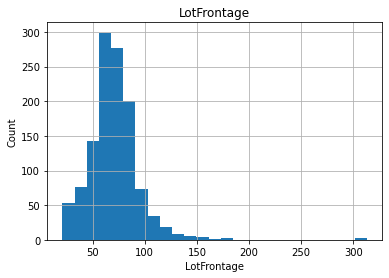

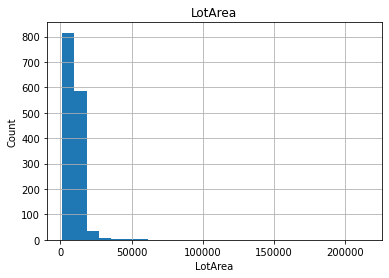

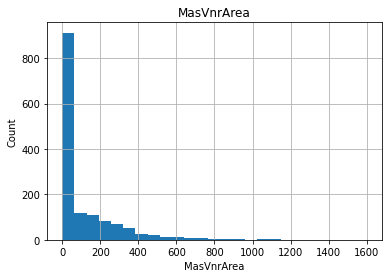

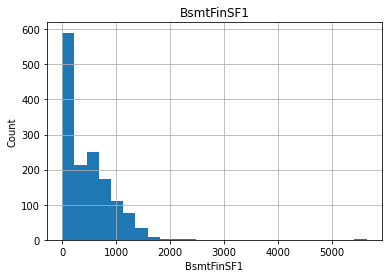

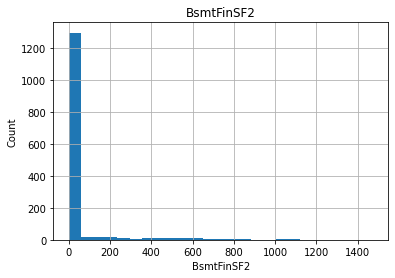

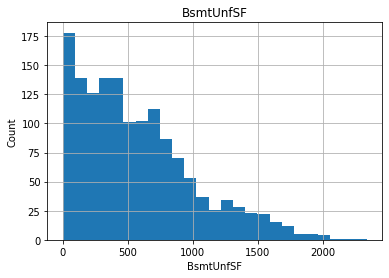

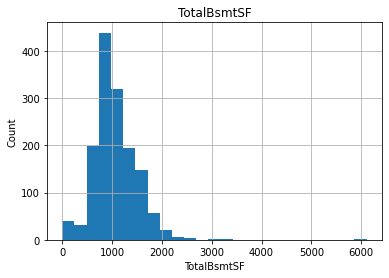

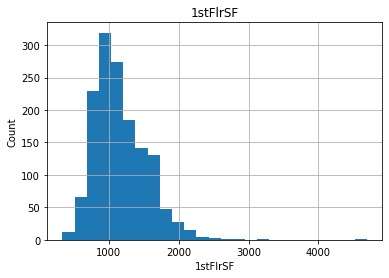

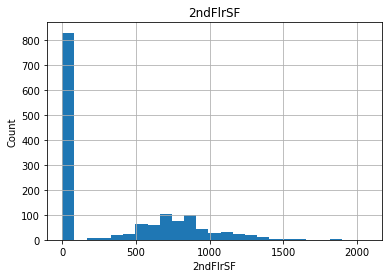

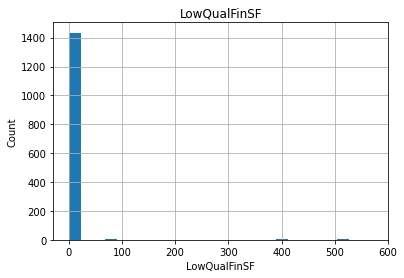

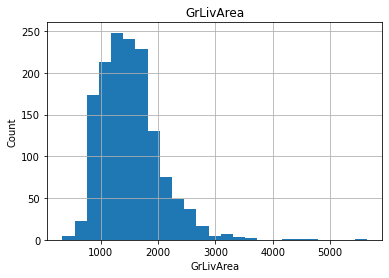

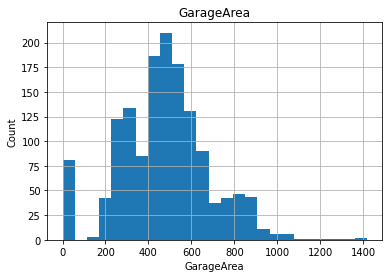

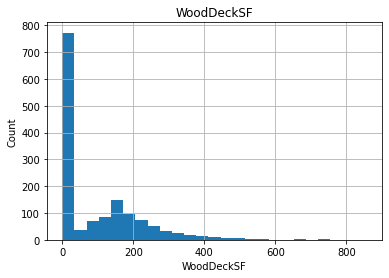

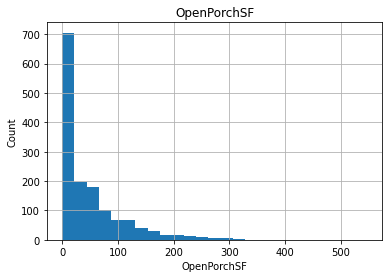

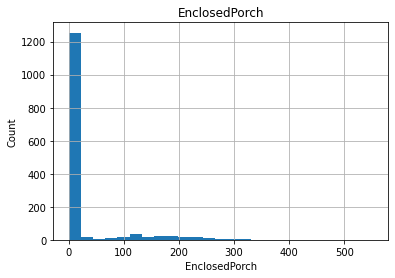

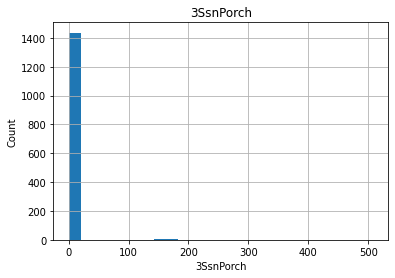

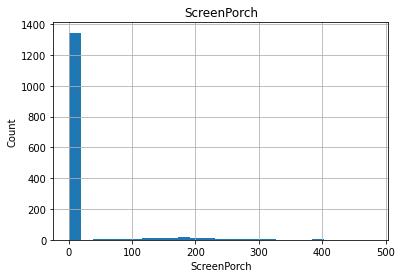

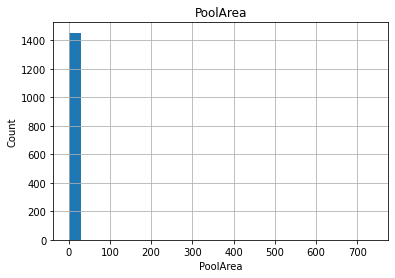

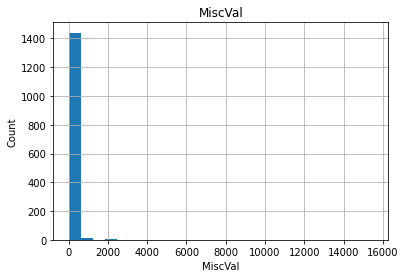

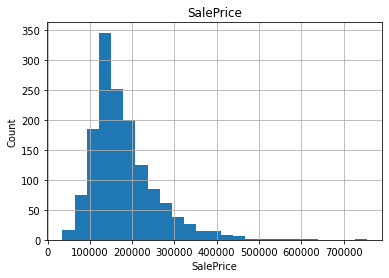

In [120]:
# Let's analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    data=train_set.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

The data seems heavily skewed. Let's check the countinuos features x SalePrice, but using a scatter plot:

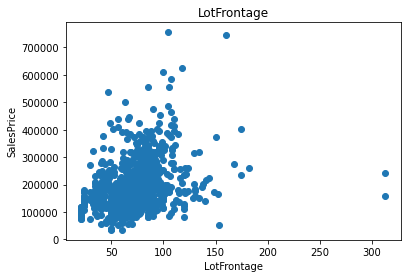

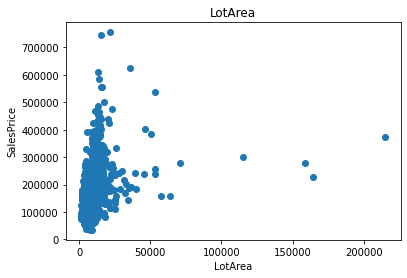

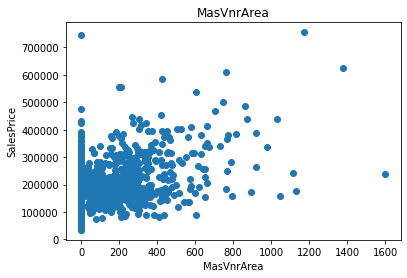

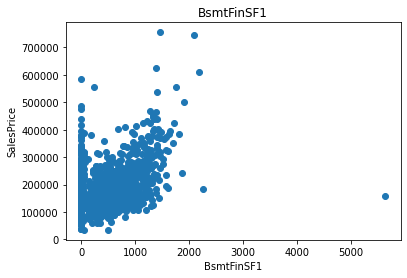

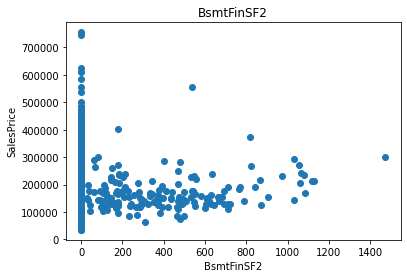

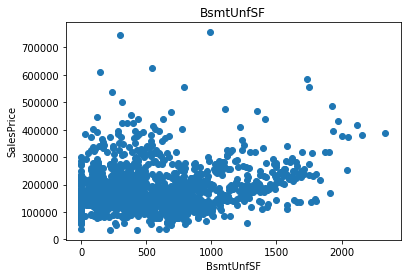

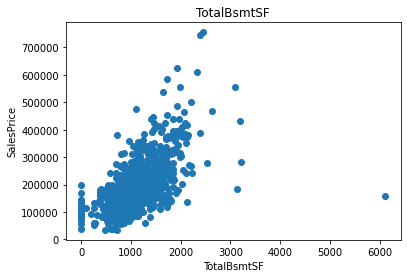

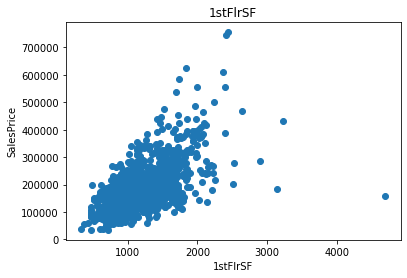

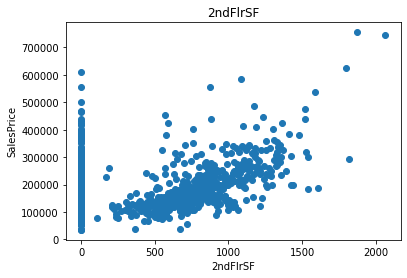

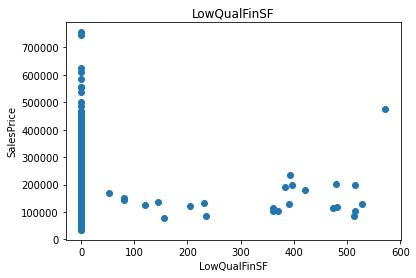

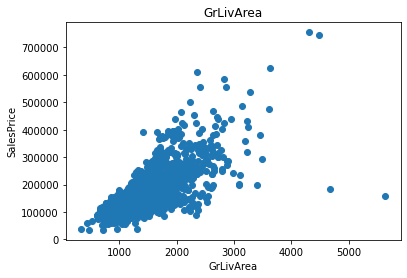

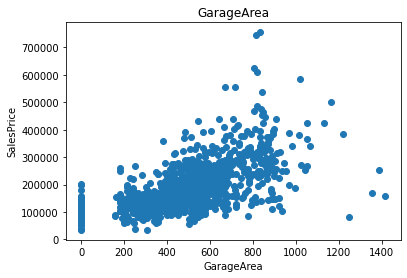

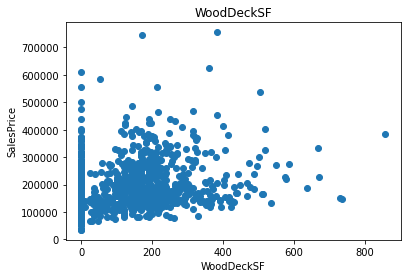

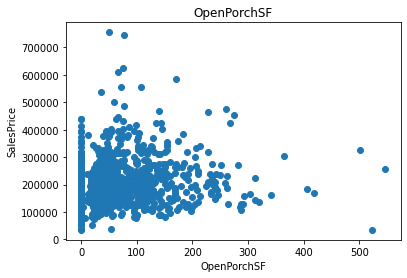

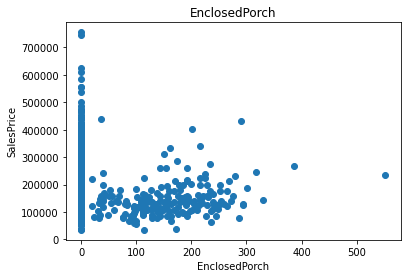

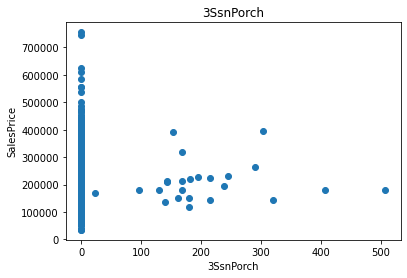

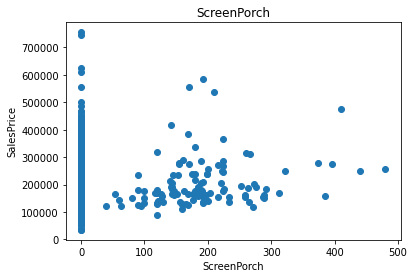

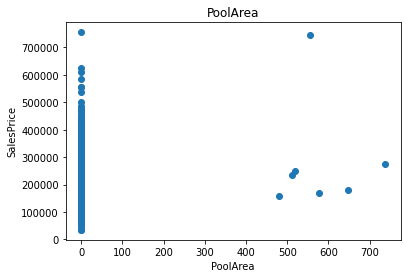

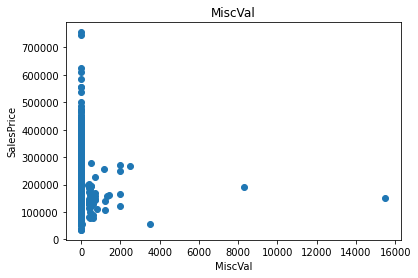

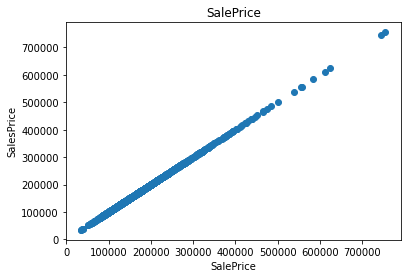

In [135]:
for feature in continuous_features:
    data=train_set.copy()
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

We will be using logarithmic transformation to spread out the scatter plot distribution:

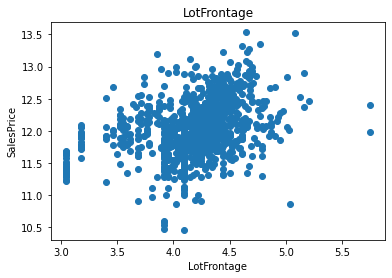

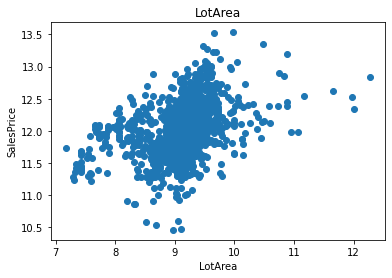

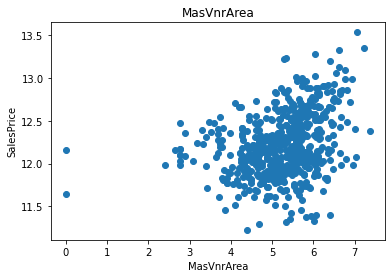

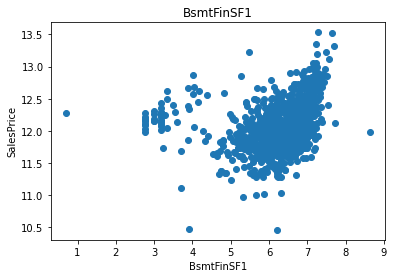

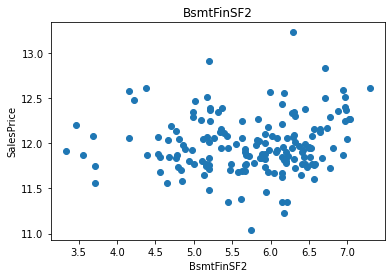

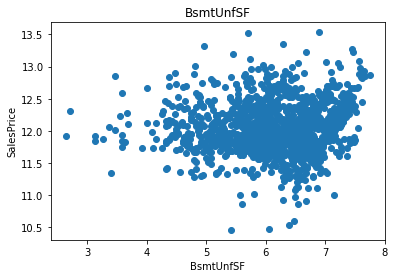

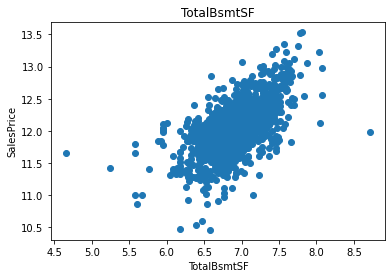

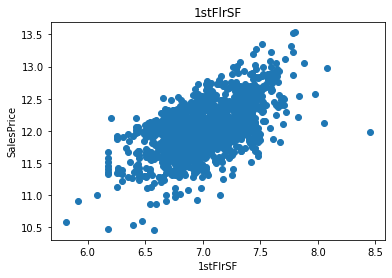

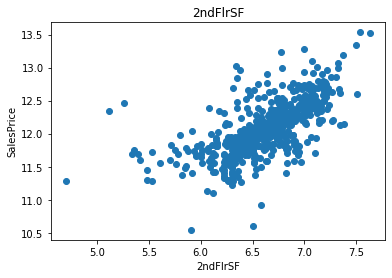

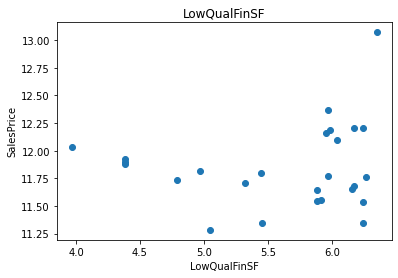

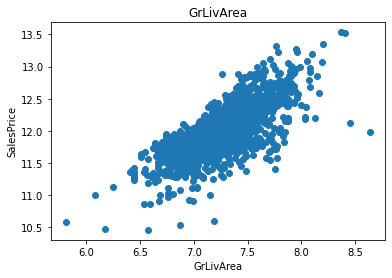

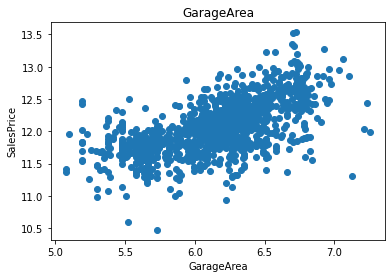

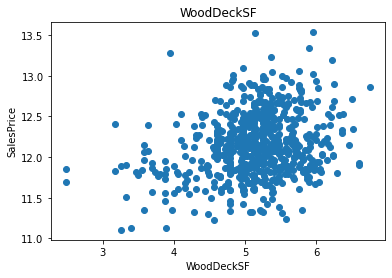

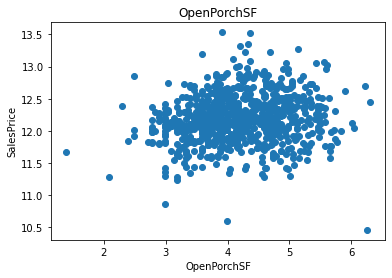

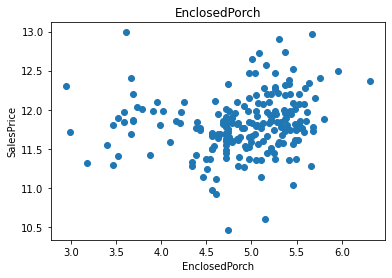

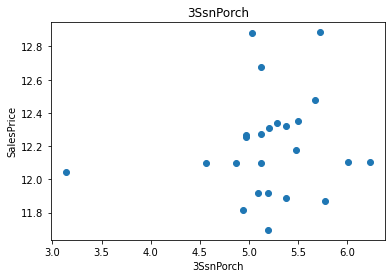

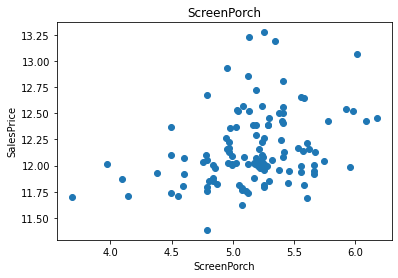

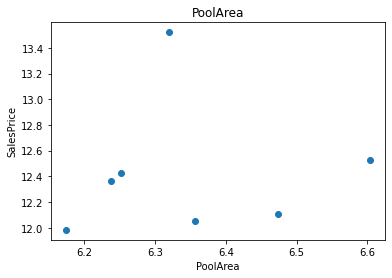

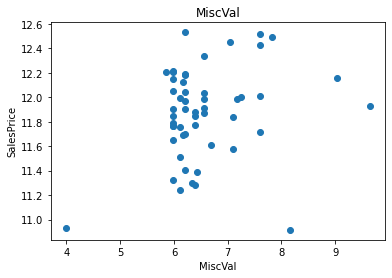

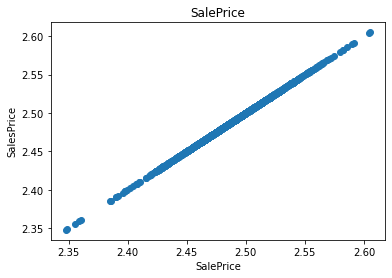

In [136]:
np.seterr(divide = 'ignore') # use this to remove warning when dividing log by 0.

for feature in continuous_features:
    data = train_set.copy()
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

Much better! Some features aren't much useful (eg., MiscVal, PoolArea), but we can see a clear correlation on other features (eg, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GarageArea...)

### Outliers

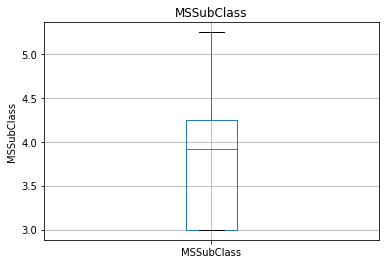

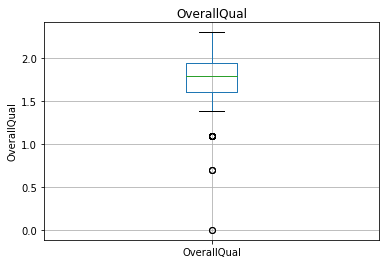

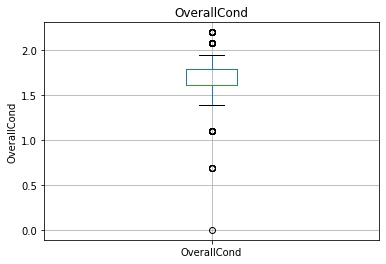

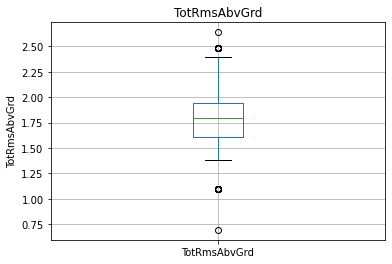

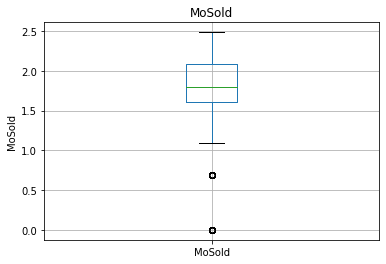

In [137]:
# Quick look at outliers discrete features:

for feature in discrete_features_corrected:
    data = train_set.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

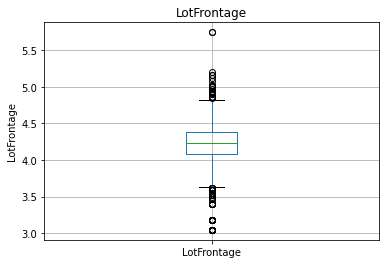

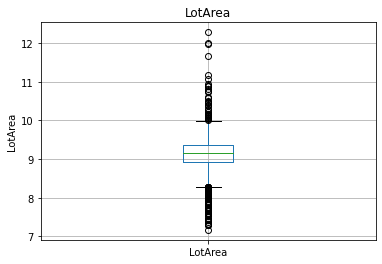

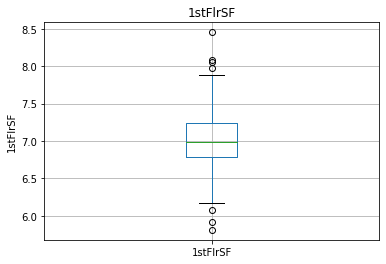

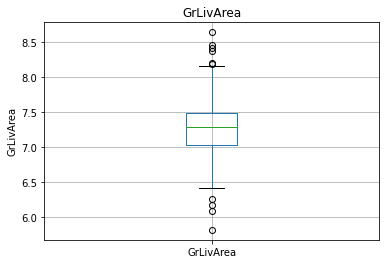

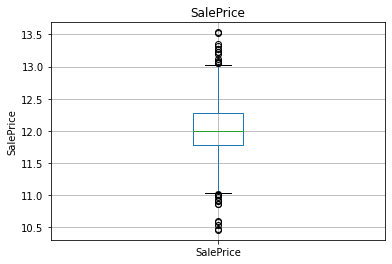

In [134]:
# Quick look at outliers continuous features:

for feature in continuous_features:
    data=train_set.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Features

In [142]:
cat_features = [feature for feature in train_set.columns if train_set[feature].dtypes == 'O']
print('Number of categorical features: ', len(cat_features))
train_set[cat_features].head()

Number of categorical features:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [163]:
# number of unique values for each feature:
for feature in cat_features:
    print('Feature: {} - Categories: {}'.format(feature,len(train_set[feature].unique())))

# this code is cleaner, but it wouldn't work because it would disregard null values from our count
# train_set[cat_features].nunique()

Feature: MSZoning - Categories: 5
Feature: Street - Categories: 2
Feature: Alley - Categories: 3
Feature: LotShape - Categories: 4
Feature: LandContour - Categories: 4
Feature: Utilities - Categories: 2
Feature: LotConfig - Categories: 5
Feature: LandSlope - Categories: 3
Feature: Neighborhood - Categories: 25
Feature: Condition1 - Categories: 9
Feature: Condition2 - Categories: 8
Feature: BldgType - Categories: 5
Feature: HouseStyle - Categories: 8
Feature: RoofStyle - Categories: 6
Feature: RoofMatl - Categories: 8
Feature: Exterior1st - Categories: 15
Feature: Exterior2nd - Categories: 16
Feature: MasVnrType - Categories: 5
Feature: ExterQual - Categories: 4
Feature: ExterCond - Categories: 5
Feature: Foundation - Categories: 6
Feature: BsmtQual - Categories: 5
Feature: BsmtCond - Categories: 5
Feature: BsmtExposure - Categories: 5
Feature: BsmtFinType1 - Categories: 7
Feature: BsmtFinType2 - Categories: 7
Feature: Heating - Categories: 6
Feature: HeatingQC - Categories: 5
Feature: 

In [164]:
# Categorical features x SalesPrice

for feature in categorical_features:
    data = train_set.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

NameError: name 'categorical_features' is not defined